In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [5]:
dfadult = pd.read_csv('/Users/jaseng/Documents/summer24_patina_project/patinaproject1/adult.csv')
dfadult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data Cleaning

In [6]:
dfadult.shape
#dfadult.info

(32561, 15)

In [7]:
dfadult[dfadult == '?'] = np.nan

In [8]:
dfadult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [20]:
for col in ['workclass', 'occupation', 'native.country']:
    dfadult[col].fillna(dfadult[col].mode()[0], inplace=True)
    
dfadult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Defining that dataset

In [21]:
X = dfadult.drop(['income'], axis=1)

y = dfadult['income']

In [22]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [25]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [26]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


### Summary Statistics

In [109]:
adult_summary = dfadult.describe()
print(adult_summary)

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week        income  
count    32561.000000  32561.000000  
mean        40.437456      0.240810  
std         12.347429      0.427581  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

In [110]:
aanhpi_summary= dfaanhpi.describe()
print(aanhpi_summary)

               age         fnlwgt  education.num  capital.gain  capital.loss  \
count  1039.000000    1039.000000    1039.000000   1039.000000   1039.000000   
mean     37.746872  159940.609240      10.960539   1478.358037     97.222329   
std      12.825133   85122.307505       2.811582   9986.156906    423.556931   
min      17.000000   14878.000000       1.000000      0.000000      0.000000   
25%      28.000000   93321.000000       9.000000      0.000000      0.000000   
50%      36.000000  143098.000000      10.000000      0.000000      0.000000   
75%      45.000000  194456.000000      13.000000      0.000000      0.000000   
max      90.000000  506329.000000      16.000000  99999.000000   2457.000000   

       hours.per.week       income  
count     1039.000000  1039.000000  
mean        40.127045     0.265640  
std         12.556816     0.441886  
min          1.000000     0.000000  
25%         40.000000     0.000000  
50%         40.000000     0.000000  
75%         40.00000

### Log regression and pca analysis

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8218


In [28]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_
# explained variance ratio indicates the proportion of the dataset's variance that lies along the axis of each pc

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

The number of dimensions required to preserve 90% of variance is 12


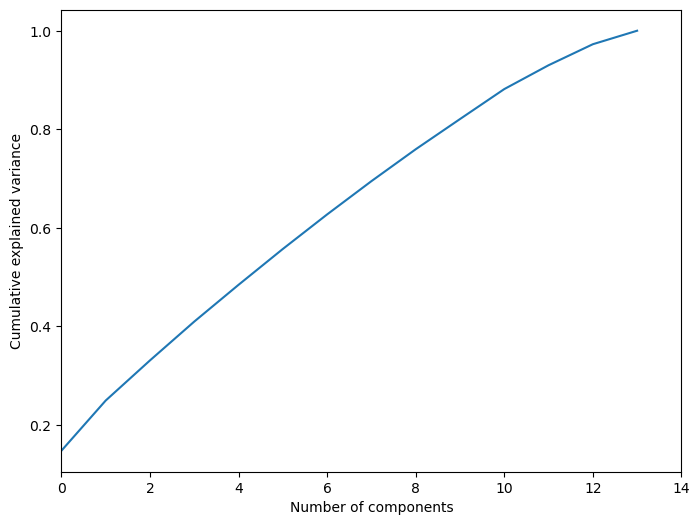

In [30]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)


plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [31]:
pca = PCA(n_components= 14)
pca = PCA(.90) 
# chooses minimum number of principal components such that x% of variance is retained
pca.fit(X_train)
pca.n_components_

12

In [32]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [33]:
# Get the indices of the selected components
selected_components = pca.components_

# Accumulate unique column names of selected components
selected_columns = set()
for component in selected_components:
    component_indices = component.argsort()[::-1][:1]  # Get the index of the most important feature
    component_names = list(X_train.columns[component_indices])
    selected_columns.update(component_names)

# Print the column names of the selected components as a list
print("Column names of selected components:")
print(list(selected_columns))

Column names of selected components:
['capital.gain', 'capital.loss', 'age', 'education.num', 'relationship', 'fnlwgt', 'race', 'workclass', 'occupation', 'marital.status', 'education', 'sex']


### Visualizations

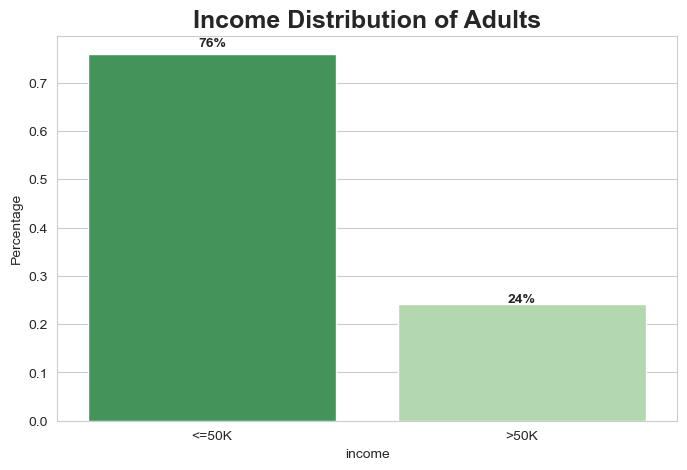

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = dfadult['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [35]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dfadult['age_group'] = dfadult['age'].apply(age_group)

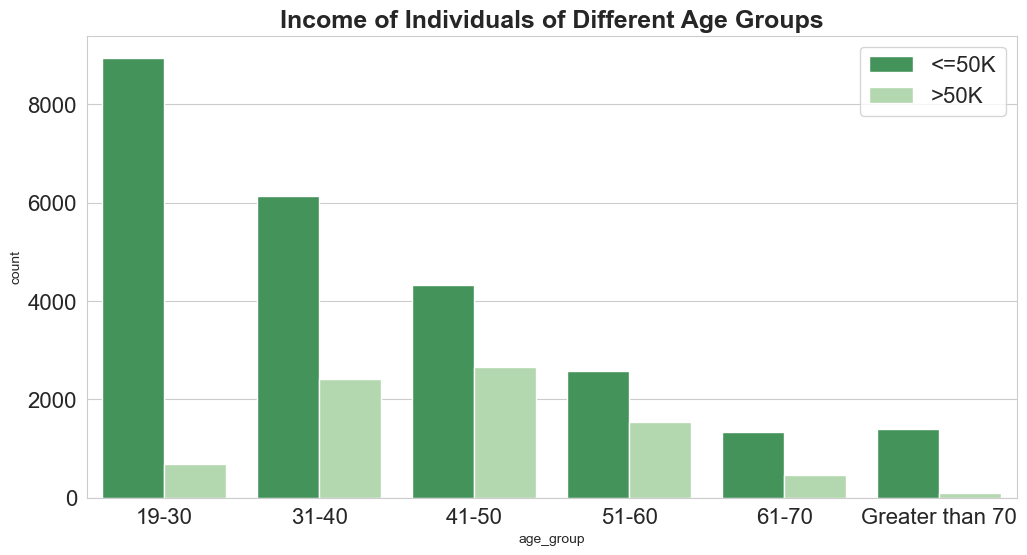

In [36]:
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='income', data=dfadult, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

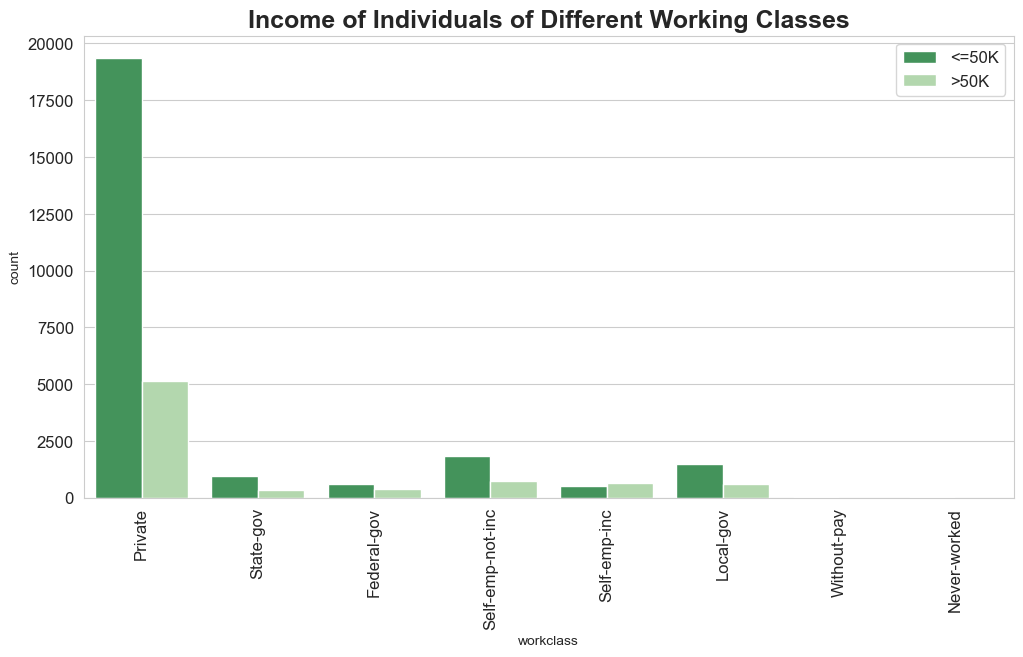

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

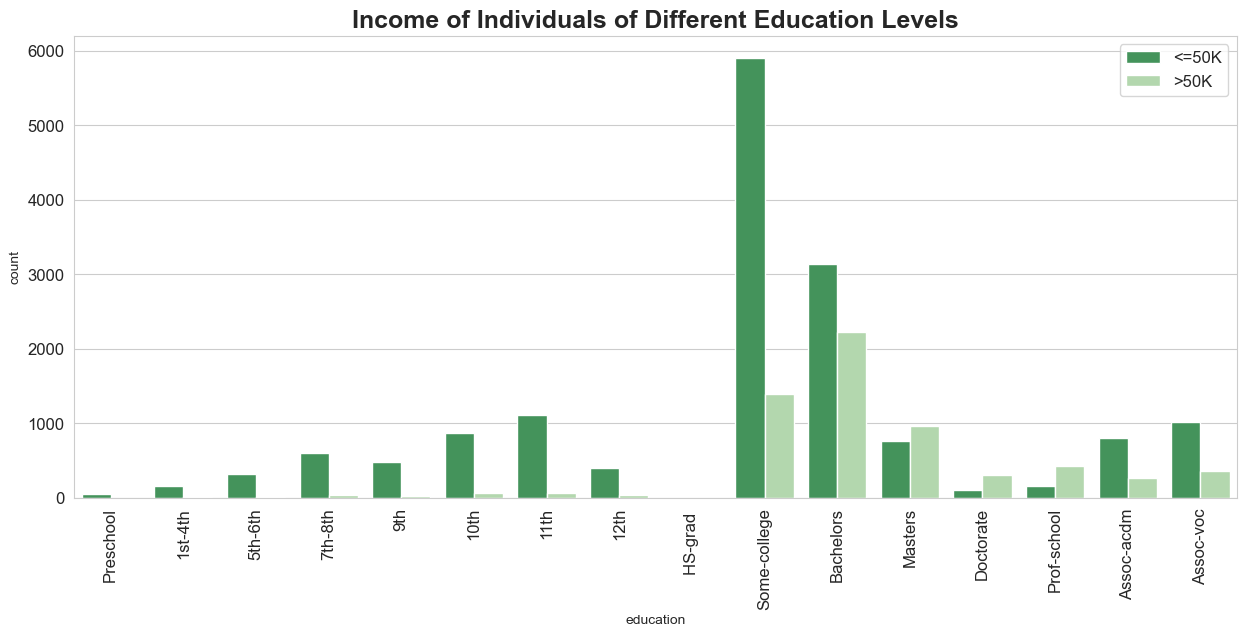

In [38]:
plt.figure(figsize=(15, 6))

order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
              'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']

sns.countplot(x='education', hue='income', data=dfadult, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

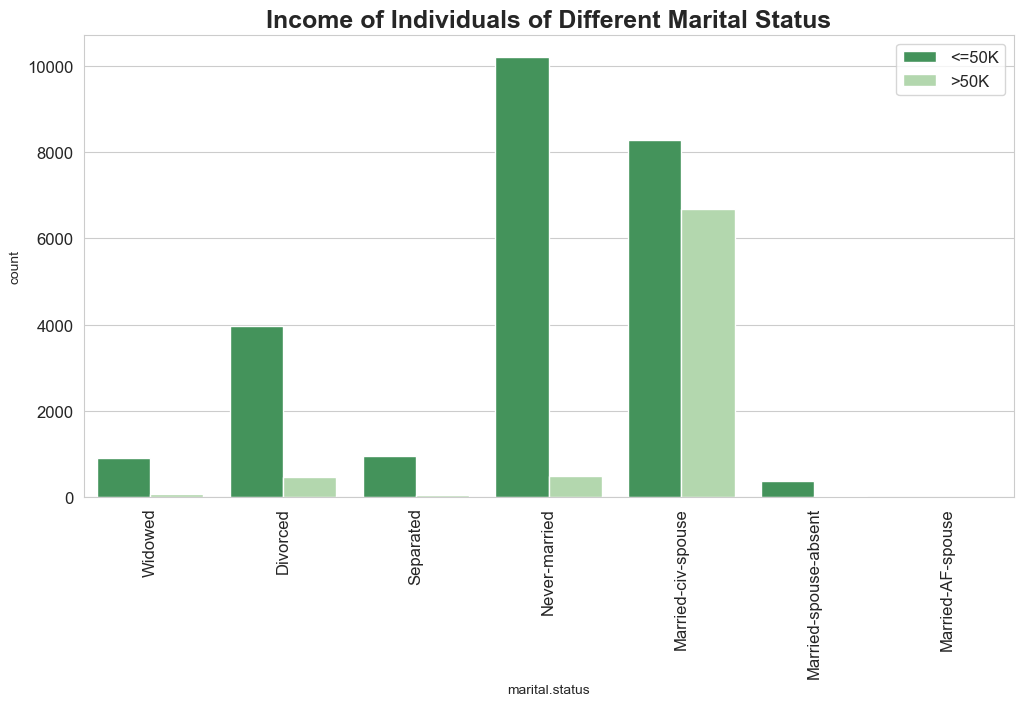

In [39]:
plt.figure(figsize=(12, 6))

sns.countplot(x='marital.status', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


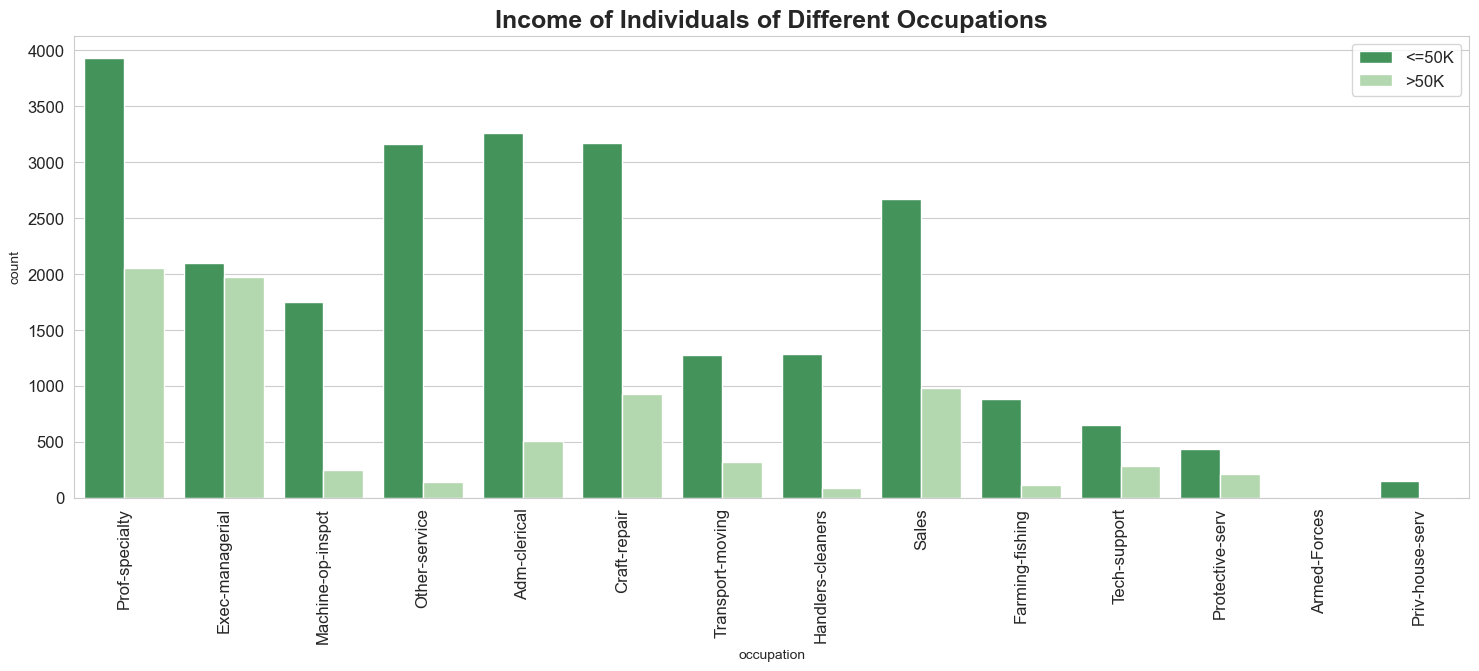

In [40]:
plt.figure(figsize=(18, 6))

sns.countplot(x='occupation', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


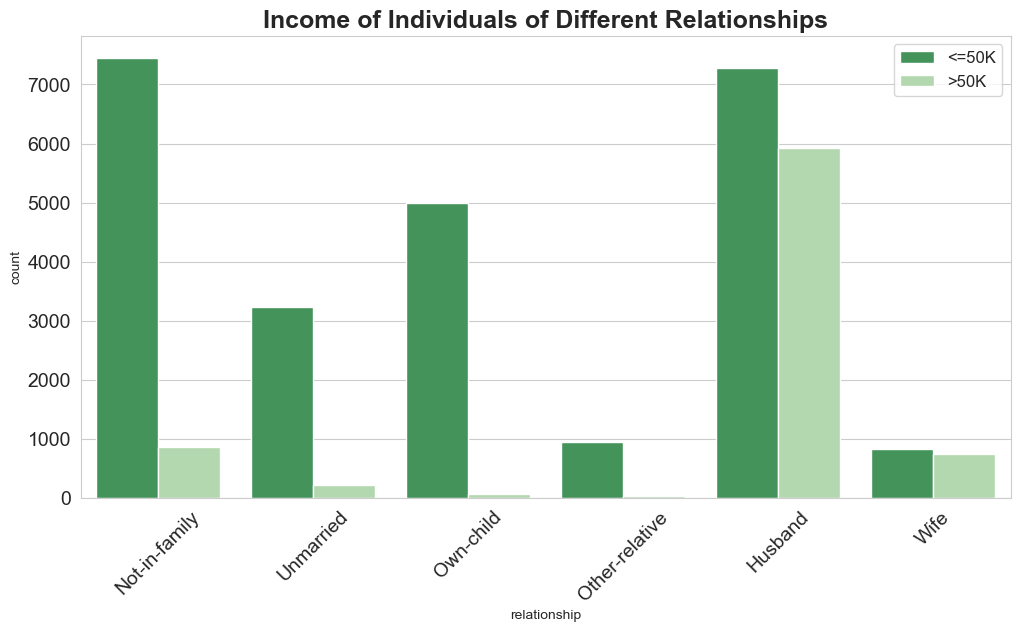

In [41]:
plt.figure(figsize=(12, 6))

sns.countplot(x='relationship', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Relationships', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.show()


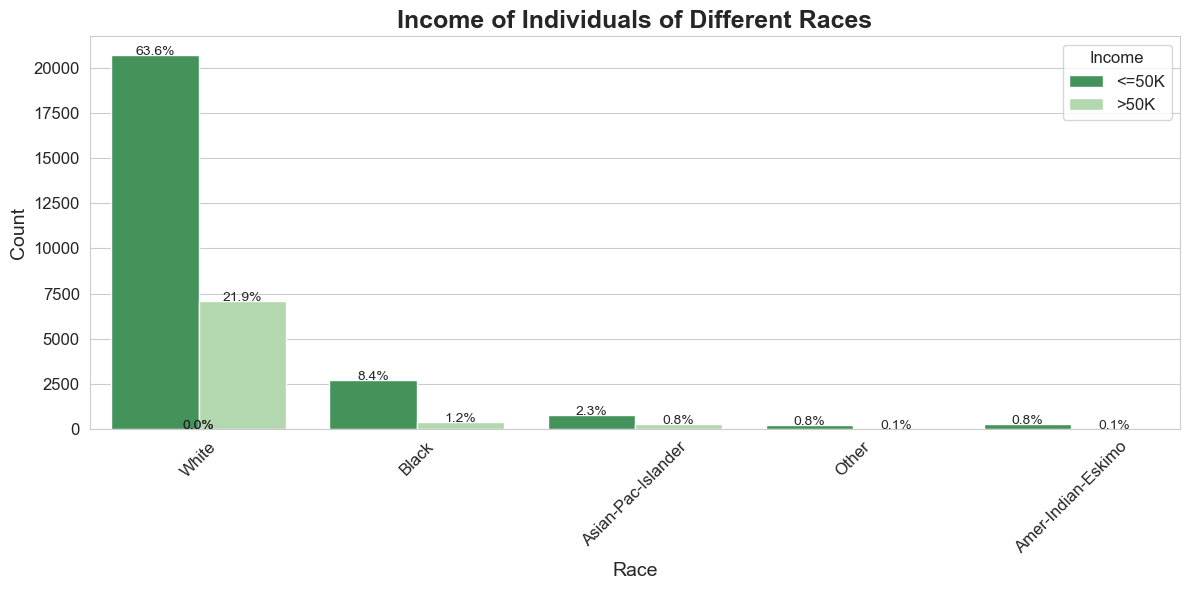

In [42]:
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(x='race', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(title='Income', title_fontsize='large', fontsize='large')

# Calculate percentages
total = len(dfadult)  # Total number of records in the DataFrame
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Add a small vertical offset
            f'{height / total:.1%}',  # Calculate percentage and format
            ha='center', fontsize=10)

plt.tight_layout()  # Ensure all annotations are visible
plt.show()


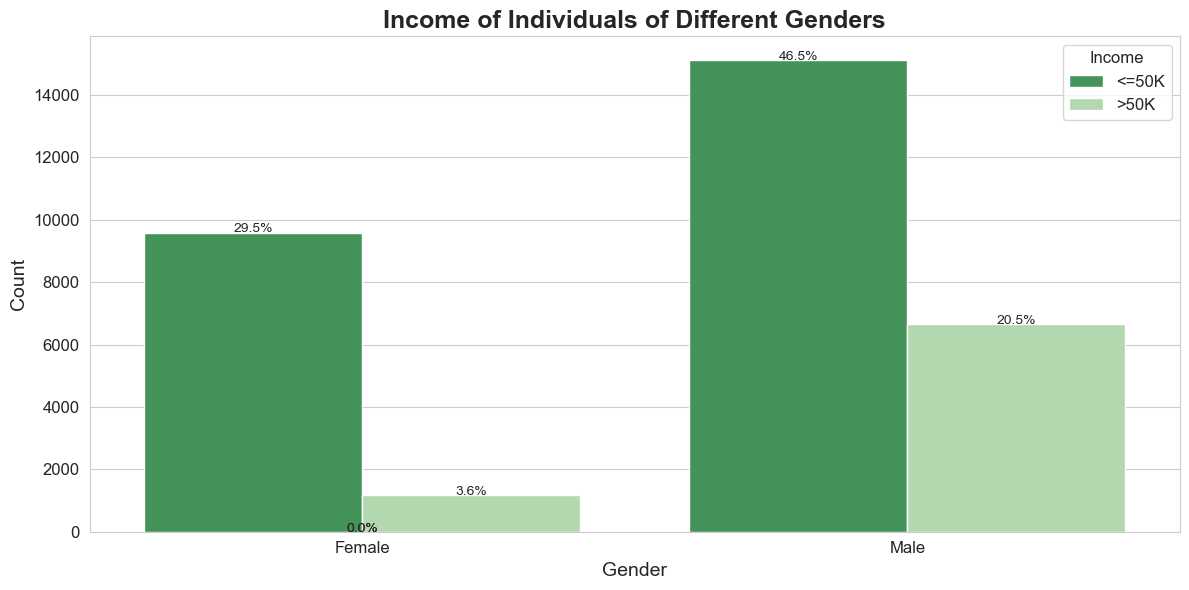

In [43]:
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(x='sex', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Income', title_fontsize='large', fontsize='large')

# Calculate percentages
total = len(dfadult)  # Total number of records in the DataFrame
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Add a small vertical offset
            f'{height / total:.1%}',  # Calculate percentage and format
            ha='center', fontsize=10)

plt.tight_layout()  # Ensure all annotations are visible
plt.show()


In [44]:
dfadult['income']=dfadult['income'].map({'<=50K': 0, '>50K': 1})

### Correlation Analysis

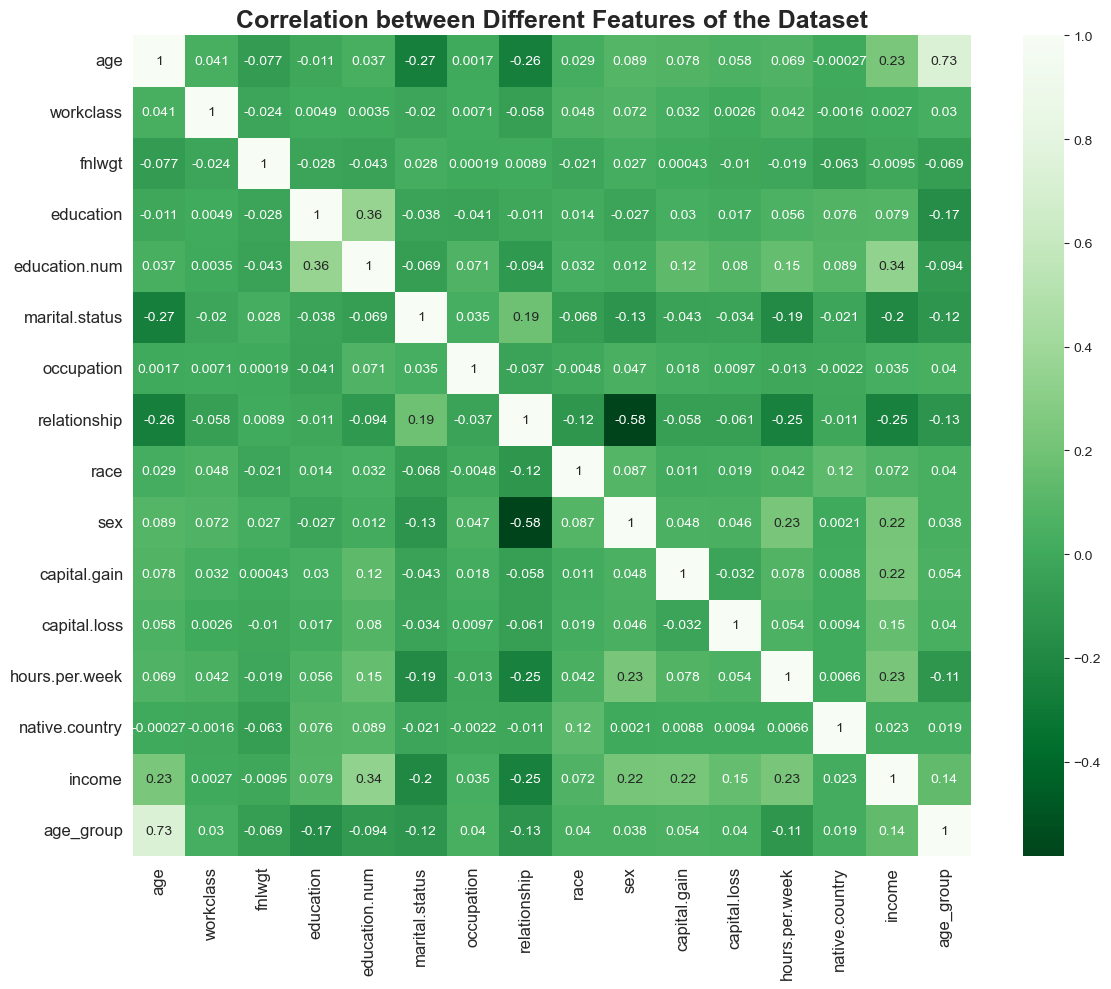

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
dfadult_encoded = dfadult.copy()

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in dfadult_encoded.columns:
    if dfadult_encoded[col].dtype == 'object':
        dfadult_encoded[col] = label_encoder.fit_transform(dfadult_encoded[col])

# Compute the correlation matrix
corr = dfadult_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Greens_r', annot=True)

plt.title("Correlation between Different Features of the Dataset", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [89]:
dfaanhpi = dfadult[dfadult['race'] == 'Asian-Pac-Islander']

# Print the filtered DataFrame
dfaanhpi.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,0,Greater than 70
63,51,Self-emp-not-inc,160724,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,2415,40,China,1,51-60
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,United-States,1,41-50
90,39,Private,198654,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,67,India,1,31-40
95,46,Private,192963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,2415,35,Philippines,1,41-50


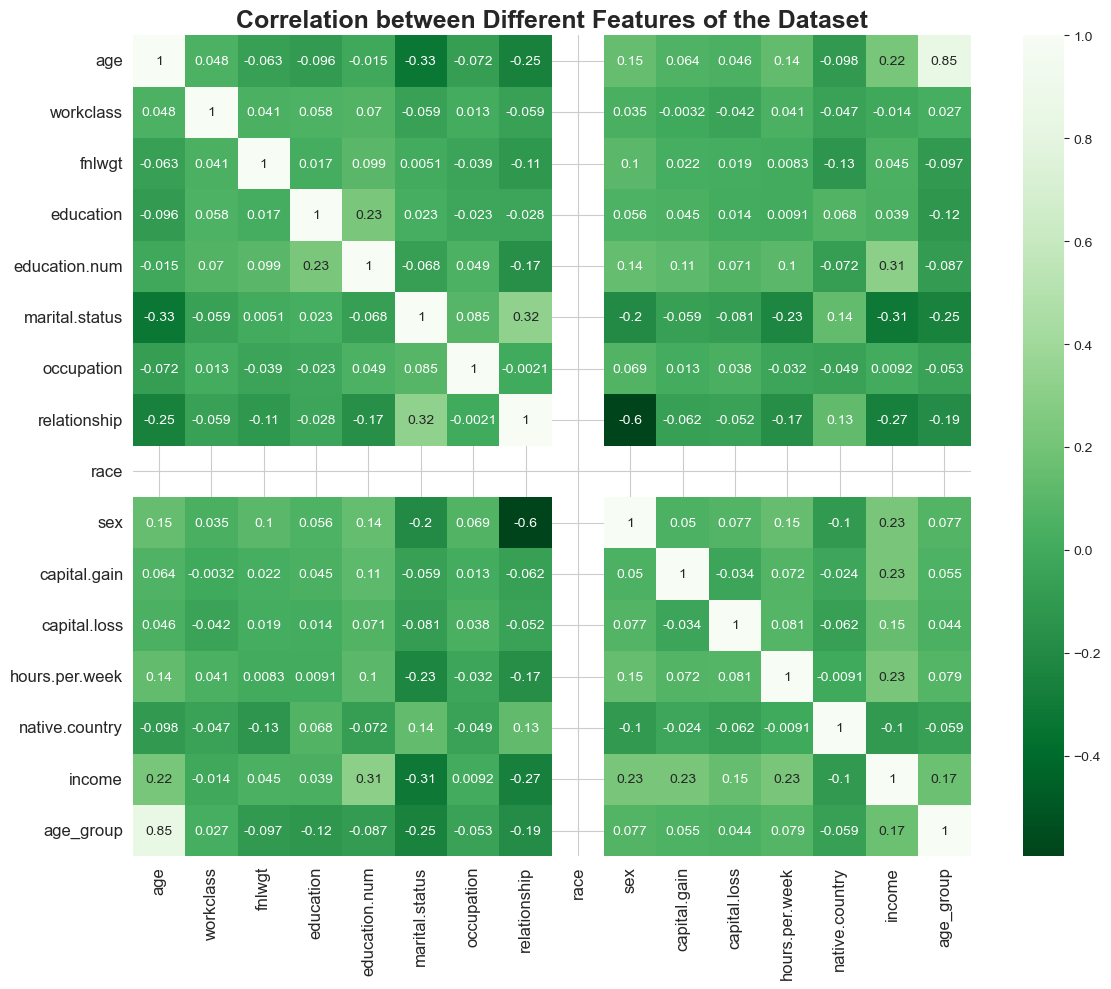

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
dfaanhpi_encoded = dfaanhpi.copy()

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in dfaanhpi_encoded.columns:
    if dfaanhpi_encoded[col].dtype == 'object':
        dfaanhpi_encoded[col] = label_encoder.fit_transform(dfaanhpi_encoded[col])

# Compute the correlation matrix
corr = dfaanhpi_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Greens_r', annot=True)

plt.title("Correlation between Different Features of the Dataset", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### PCA on AANHPI

In [91]:
X = dfaanhpi.drop(['income', 'race', 'age_group'], axis=1)
y = dfaanhpi['income']
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,2457,40,Vietnam
63,51,Self-emp-not-inc,160724,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,2415,40,China
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Male,0,2415,55,United-States
90,39,Private,198654,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Male,0,2415,67,India
95,46,Private,192963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Male,0,2415,35,Philippines


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [93]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
label_encoders = {}

for feature in categorical:
    le = preprocessing.LabelEncoder()
    # Fit on both training and test data to ensure consistency
    le.fit(pd.concat([X_train[feature], X_test[feature]], axis=0))
    X_train[feature] = le.transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    label_encoders[feature] = le

# Example of how to use label_encoders for inverse_transform
print(label_encoders['native.country'].inverse_transform([0, 1, 2, 3, 4]))

# Print encoded data
print("Encoded X_train:")
print(X_train)
print("\nEncoded X_test:")
print(X_test)

['Cambodia' 'Canada' 'China' 'Dominican-Republic' 'England']
Encoded X_train:
       age  workclass  fnlwgt  education  education.num  marital.status  \
11960   63          2  137192          9             13               1   
26273   60          2  139586          8             11               5   
24473   39          2  301867          9             13               0   
28434   22          2  177902         15             10               3   
25988   43          2   69758          7             12               1   
...    ...        ...     ...        ...            ...             ...   
32442   39          0  110622          9             13               1   
24677   24          2   73928          8             11               3   
26739   49          2   24712          9             13               3   
17857   35          2  320451         12             14               1   
22072   37          2  245482         11              9               1   

       occupation  re

In [94]:
scaler = StandardScaler()

In [95]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country
11960,63,2,137192,9,13,1,1,0,1,0,0,40,19
26273,60,2,139586,8,11,5,2,4,0,0,0,40,23
24473,39,2,301867,9,13,0,0,1,0,0,0,24,15
28434,22,2,177902,15,10,3,8,1,0,0,0,25,23
25988,43,2,69758,7,12,1,11,0,1,0,0,40,23


In [96]:
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country
20389,26,5,147719,9,13,3,8,1,1,0,0,20,9
21814,41,2,173858,11,9,1,6,0,1,0,0,40,2
11939,36,2,154835,11,9,4,0,3,0,0,0,40,15
10354,22,2,182771,8,11,3,8,3,1,0,0,20,23
15671,65,2,137354,15,10,1,8,0,1,0,0,20,23


In [97]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [98]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [99]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with all the features: 0.7917


In [100]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_
# explained variance ratio indicates the proportion of the dataset's variance that lies along the axis of each pc

array([0.17096313, 0.10645208, 0.08945135, 0.08531505, 0.07951708,
       0.07865475, 0.07402113, 0.06940379, 0.06407818, 0.05508779,
       0.05078933, 0.04846659, 0.02779974])

In [101]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 11


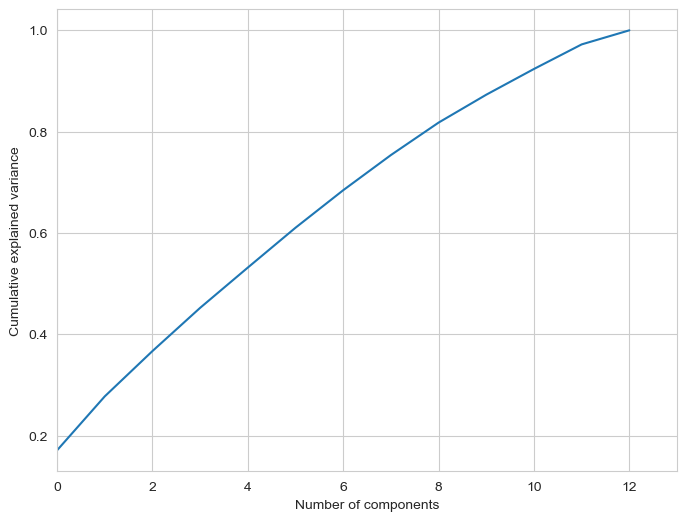

In [102]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,13)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [103]:
pca = PCA(n_components= 13)
pca = PCA(.90) 
# chooses minimum number of principal components such that x% of variance is retained
pca.fit(X_train)
pca.n_components_

11

In [104]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [105]:
# Get the indices of the selected components
selected_components = pca.components_

# Accumulate unique column names of selected components
selected_columns = set()
for component in selected_components:
    component_indices = component.argsort()[::-1][:1]  # Get the index of the most important feature
    component_names = list(X_train.columns[component_indices])
    selected_columns.update(component_names)

# Print the column names of the selected components as a list
print("Column names of selected components:")
print(list(selected_columns))

Column names of selected components:
['capital.gain', 'capital.loss', 'age', 'education.num', 'relationship', 'fnlwgt', 'workclass', 'occupation', 'marital.status', 'education', 'sex']


In [107]:
pca = PCA(n_components= 13)
pca = PCA(.70) 
# chooses minimum number of principal components such that x% of variance is retained
pca.fit(X_train)
pca.n_components_

10

### to do week of july 1

-	Different types of graphs
-	Markdowns
-	Comparing against Asian Americans
-	Think about how to compare with 2017 data
-	Look to see if 2022 or 2023 dataset


- look at native country - more races? --> percentage of asians per state

Retirement age (https://www.cnbc.com/select/americans-are-retiring-later-than-they-did-in-the-1990s/#:~:text=According%20to%20a%20new%20Gallup,to%20age%2061%20in%202022.) 
- interesting article on retirement vs gender, education
- 2024: average retirement age is around 62-63 yo
- 1994: average retirement age was around 57 yo

What did 50k in 1994 mean
- 50,000 in 1994 is equivalent to $105,194.10 today!